In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [52]:
rng = np.random.default_rng()

class node():
    def __init__(self, name: str):
        self.name = name
        self.cnt = None
    
    def get_value(self):
        return self.cnt
        
    def __repr__(self):
        return self.name
    
class layer():
    def __init__(self, name : str, nl: int):
        global rng
        self.nl = nl
        self.nodes = []
        self.name = name
        self.rng = rng
        self.max_N_leaves = 10000
        
    def distribution(self, node: node) -> float:
        m = node + 2
        n = m/(m-1)
        p = 1/m
        #p = 0.1
        return self.rng.negative_binomial(n,p)
    
    def sample(self, previous_layer) -> None:
        if len(previous_layer) < self.max_N_leaves:
            previous_nodes = previous_layer.nodes
        else:
            previous_nodes = np.random.choice(previous_layer.nodes, size=self.max_N_leaves, replace=False)
        for node in previous_nodes:
            for _ in range(self.nl):
                self.nodes.append(self.distribution(node))
    @property
    def sorted_nodes(self):
        return np.sort(self.nodes)[::-1]
      
    def __len__(self):
        return len(self.nodes)
   
    def __repr__(self):
        return f"{self.name}, nodes: {self.nodes}"
    
class first_layer(layer): 
    def sample(self, previous_layer):
        raise NotImplementedError("First layer cannot have a previous layer")
            
    def sample(self) -> None:
        for node in range(self.nl):
            self.nodes.append(self.distribution(10))

In [53]:
L = 100
nl = 3
layers = [first_layer("l0", nl)]
layers[0].sample()
for il,l in enumerate(range(L)):
    if il % (L/10) == 0:
        print(il)
    new_layer = layer(f"l{il+1}", nl)
    layers.append(new_layer)
    new_layer.sample(layers[il])

0
10
20
30
40
50
60
70
80
90


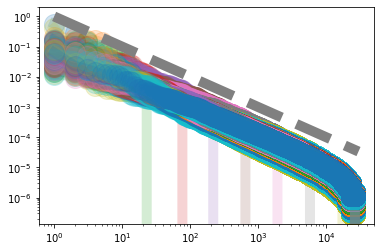

In [54]:
for l in range(L+1):
    freqs = layers[l].sorted_nodes
    x = np.linspace(1, len(freqs), len(freqs))
    plt.plot(x, freqs/np.sum(freqs), marker="o", ms=20, lw=10, alpha=0.2)

plt.plot(x, 1/x, lw=10, ls="--", c="gray")

plt.xscale("log")
plt.yscale("log")

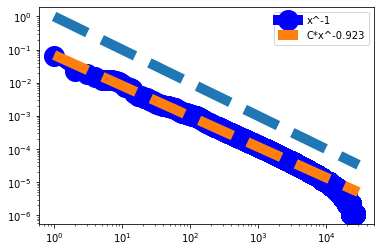

In [55]:
#freqs = np.sort(np.concatenate([l.sorted_nodes for l in layers]).ravel())[::-1]
#
#plt.plot(x, freqs/np.sum(freqs), marker="o", ms=20, c="gray", lw=10, label="x^-1")

layer_of_interest = layers[-1]
cnts = layer_of_interest.sorted_nodes/np.sum(layer_of_interest.sorted_nodes)
plt.plot(np.linspace(1, len(layer_of_interest), len(layer_of_interest)), cnts, marker="o", ms=20, c="blue", lw=10, label="x^-1")

x = np.linspace(1, len(layer_of_interest), len(layer_of_interest))
plt.plot(x, 1/x, lw=10, ls="--")

popt, pcov = curve_fit(lambda x, C, gamma: C * np.power(x, - gamma), x[5:], cnts[5:])
plt.plot(x, popt[0]*np.power(x,-popt[1]), lw=10, ls="--", label=f"C*x^-{round(popt[1],3)}")


plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-5,5e-1)
plt.legend()

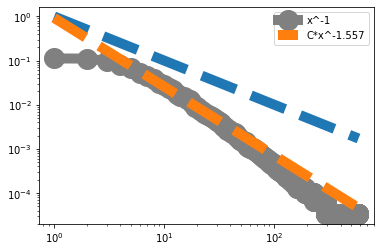

In [56]:
freqs = np.sort(np.unique(layers[-1].nodes,return_counts=True)[1])[::-1]
x = np.linspace(1, len(freqs), len(freqs))
plt.plot(x, freqs/np.sum(freqs), marker="o", ms=20, c="gray", lw=10, label="x^-1")

plt.plot(x, 1/x, lw=10, ls="--")

popt, pcov = curve_fit(lambda x, C, gamma: C * np.power(x, - gamma), x[5:], (freqs/np.sum(freqs))[5:])
plt.plot(x, popt[0]*np.power(x,-popt[1]), lw=10, ls="--", label=f"C*x^-{round(popt[1],3)}")


plt.xscale("log")
plt.yscale("log")
#plt.ylim(1e-5,5e-1)
plt.legend()

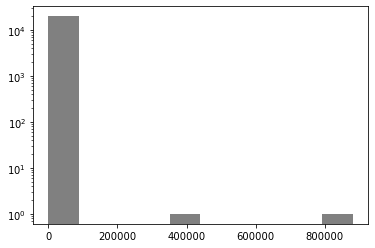

In [760]:
counts, _, _ = plt.hist(layers[-1].nodes, color="gray")

plt.yscale("log")
#plt.xscale("log")
plt.show()

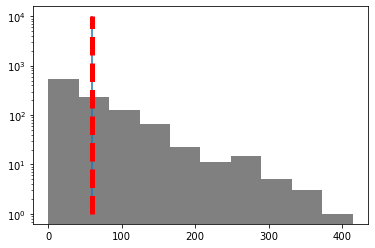

In [750]:
m = 60
n = m/(m-1)
p = 1/m
N = 1000
counts, _, _ = plt.hist([rng.negative_binomial(n,p) for _ in range(N)], color="gray")
plt.vlines([n*(1-p)/p],1,1e4)
plt.vlines([m],1,1e4, lw=5, color="red", ls="--")


plt.yscale("log")
#plt.xscale("log")
plt.show()

In [715]:
n*p/(1-p)

2.2222222222222223

In [734]:
n = 1
p = 0.01
np.average([rng.negative_binomial(n,p) for _ in range(N)]),n*(1-p)/p

(107.69, 99.0)

In [713]:
1*100*0.9

90.0

In [1]:
import gc
gc.collect()

246